In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def load_image(image_path):

    """
    Carga una imagen en escala de grises.
    :param image_path: Ruta de la imagen.
    :return: Imagen cargada o None si no se pudo cargar.

    
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: No se pudo cargar la imagen '{image_path}'.")
        return None
    return image

### Imagen con ruido de sal y pimienta

In [4]:
image = load_image('Imagenes/RisasPimientaSal.png')
if image is None:
    print("No se pudo cargar la imagen.")

Imagen con sombras

In [5]:
image_shadows = load_image('Imagenes/Castle.jpg')

Imagen con Ruido Gaussiano

In [6]:
gaussian_image = load_image('Imagenes/GaussianImage.jpg')

Imagen adecuada

In [7]:
hd_image = load_image('Imagenes/girl-535251_1920.webp')

In [8]:
cv2.imshow('Imagen Original', image_shadows)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Filtro de Media

📌 Definición
El Filtro de Media es una técnica de procesamiento de imágenes que suaviza la imagen reduciendo las variaciones de intensidad entre píxeles vecinos. Es un filtro lineal que reemplaza el valor de cada píxel por el promedio de los valores de los píxeles en su vecindad.


### 📐 Fórmula Matemática

$$
I'(x, y) = \frac{1}{mn} \sum_{i=-a}^{a} \sum_{j=-b}^{b} I(x+i, y+j)
$$

**Donde:**

* $I'(x, y)$: es el valor del píxel filtrado en la posición $(x, y)$.
* $m \times n$: es el tamaño del kernel (por ejemplo, 3x3).
* $a = \frac{m - 1}{2}$, $b = \frac{n - 1}{2}$


In [9]:
# Filtro de media
filtered_image = cv2.blur(image, (5, 5))

(-0.5, 300.5, 349.5, -0.5)

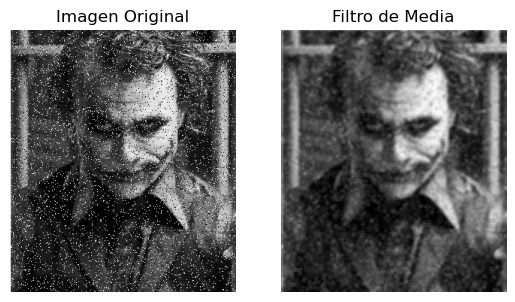

In [10]:
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Media')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

El filtro de Media funciona mejor para el ruido Gaussiano, no es tan eficaz para el ruido de sal y pimienta de la imagen. Parece difuminarlo y hay un efecto de "manchas".

In [11]:
filtered_image = cv2.blur(gaussian_image, (5, 5))

(-0.5, 223.5, 223.5, -0.5)

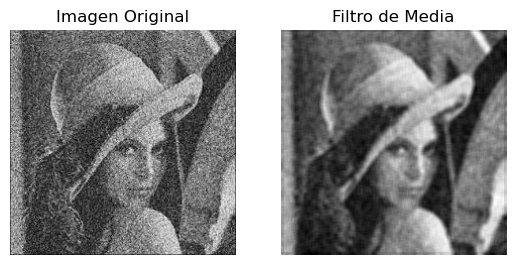

In [12]:
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Media')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

# Filtro de Mediana

### 📐 Fórmula Matemática

$$
I'(x, y) = \text{mediana}\left\{ I(i, j) \,\big|\, (i,j) \in \text{vecindad de } (x, y) \right\}$$

**Donde:**

* $I'(x, y)$: es el valor del píxel filtrado en la posición $(x, y)$.
* $I(i, j)$: es el valor de un píxel en la vecindad.
* $\text{vecindad de } (x, y)$: es la ventana de píxeles alrededor de $(x, y)$, típicamente $3 \times 3$, $5 \times 5$, etc.

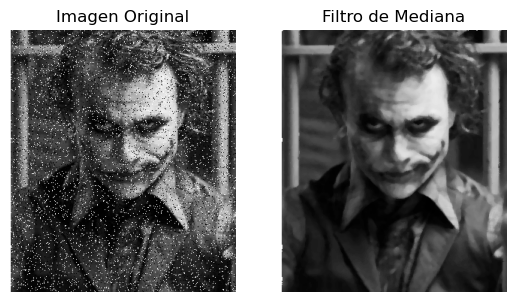

In [13]:
median_filtered_image = cv2.medianBlur(image, 5)

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Mediana')
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')
plt.show()

# Filtro Logarítmico

---

## Filtro Logarítmico

El **filtro logarítmico** no es un filtro espacial tradicional (como los filtros de media o mediana), sino una **transformación puntual**. Su principal objetivo es **realzar los detalles en las zonas oscuras** de una imagen. Lo logra al aprovechar la propiedad matemática del logaritmo que **expande los valores pequeños y comprime los grandes**.

Es ideal cuando tienes imágenes con un **gran rango dinámico** y se quiere destacar las sombras o áreas poco iluminadas.

---

### 📐 Fórmula Matemática

La transformación logarítmica se describe con la siguiente fórmula:

$$s = c \cdot \log(1 + r)$$

**Donde:**
* $s$: es el valor del píxel de salida.
* $c$: es una constante de escala.
* $r$: es el valor del píxel de entrada (generalmente normalizado entre 0 y 1, o 0 a 255).

La constante $c$ a menudo se calcula para normalizar la salida a un rango específico (por ejemplo, 8 bits, 0-255). Una forma común de calcularla es:

$$c = \frac{255}{\log(1 + r_{\text{max}})}$$

Donde $r_{\text{max}}$ es el valor máximo posible del píxel de entrada (por ejemplo, 255 para una imagen de 8 bits).

---

### 🧠 Ejemplo Conceptual

Consideremos los siguientes valores de píxeles: [10, 50, 100, 200]

Si aplicamos la fórmula logarítmica (asumiendo que $r_{\text{max}} = 255$, entonces $c = \frac{255}{\log(1 + 255)} \approx \frac{255}{\log(256)}$):

$$s = 255 \cdot \frac{\log(1 + r)}{\log(256)}$$

Los resultados aproximados serían:

* Si $r = 10 \Rightarrow s \approx 73$
* Si $r = 50 \Rightarrow s \approx 144$
* Si $r = 100 \Rightarrow s \approx 187$
* Si $r = 200 \Rightarrow s \approx 236$

Como se peude observar, el valor inicial de **10 se "expande" mucho más** en relación con su valor original (de 10 a 73) que el valor de 200 (de 200 a 236). Esto demuestra cómo el filtro logarítmico **realza los detalles en las zonas oscuras** (valores de píxeles bajos) de la imagen.


Empezamos por convertir a float (ya que trabajaremos con decimales). Además calculamos el **ln(1+r)**

In [14]:
shadows_float = image_shadows.astype(np.float32)
shadows_log = np.log(shadows_float + 1)

Estiramos la imagen para ocupar todo el espacio desde 0 a 255 (luminosidad)

In [15]:
shadows_normalized_log = cv2.normalize(
    shadows_log, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
shadows_final = np.uint8(shadows_normalized_log)



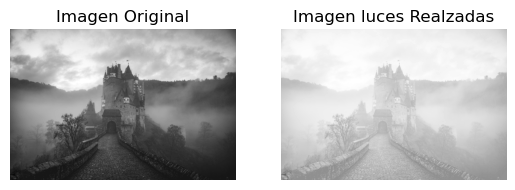

In [16]:
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image_shadows, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen luces Realzadas')
plt.imshow(shadows_final, cmap='gray')
plt.axis('off')

plt.show()

Realzados lso detalles oscuros y comprimidos los claros

# Filtro de Cuadro Normalizado

### 📌 **Definición**

Este filtro es muy parecido al **filtro de media**, pero con una diferencia clave: el kernel está normalizado explícitamente para que todos los valores sumen 1. Es un tipo de **filtro de convolución** que calcula el promedio de los píxeles en una ventana, pero usa una matriz uniforme y normalizada.

Se llama "cuadro" porque usa un **kernel cuadrado de tamaño fijo**, como $3 \times 3$, $5 \times 5$, etc.

---

### 📐 **Fórmula Matemática**

El kernel de un filtro de cuadro normalizado de tamaño $k \times k$ es:

$$
K = \frac{1}{k^2}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
1 & 1 & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
$$

Y se aplica por convolución:

$$I'(x, y) = \sum_{i=-a}^{a} \sum_{j=-b}^{b} K(i,j) \cdot I(x+i, y+j)$$

Es idéntico al filtro de media, pero más explícito y configurable en OpenCV.

---

### 🧠 **Ejemplo Conceptual**

Si se tiene un kernel de $3 \times 3$:

$$
K = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
$$

Al aplicarlo sobre una imagen, produce un **suavizado por promedio uniforme**, como el filtro de media.

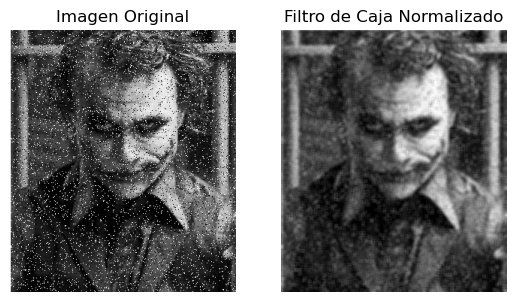

In [17]:
box_normalized = cv2.boxFilter(image, ddepth=-1, ksize=(5, 5), normalize=True)
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Caja Normalizado')
plt.imshow(box_normalized, cmap='gray')
plt.axis('off')

plt.show()

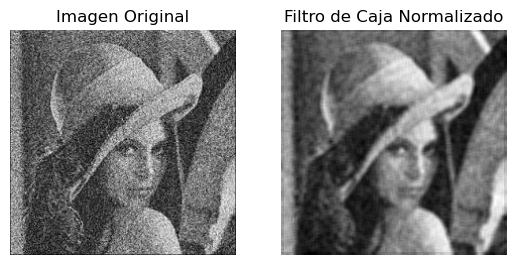

In [18]:
box_normalized = cv2.boxFilter(gaussian_image, ddepth=-1, ksize=(5, 5), normalize=True)

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro de Caja Normalizado')
plt.imshow(box_normalized, cmap='gray')
plt.axis('off')

plt.show()


# Filtro Gaussiano

### 📌 **Definición**

Filtro lineal que suaviza imágenes mediante convolución con una función gaussiana. Reduce ruido y detalles finos preservando mejor los bordes que otros filtros de suavizado.

---

### 📐 Fórmula del filtro gaussiano

La función gaussiana bidimensional se define como:

$$G(x,y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2+y^2}{2\sigma^2}}$$

Donde:

* $x,y$: coordenadas relativas al centro del kernel.
* $\sigma$: desviación estándar, que controla el grado de suavizado.

Esta función genera una matriz de pesos que se utiliza como kernel para la convolución.

### ✅ Ventajas del filtro gaussiano

* **Suavizado efectivo:** Reduce el ruido y los detalles finos de manera muy efectiva, resultando en imágenes más suaves.
* **Conservación de bordes:** A diferencia de otros filtros de suavizado (como el filtro de media), el filtro gaussiano tiende a preservar los bordes importantes en la imagen, aunque los suaviza un poco.
* **Separabilidad:** El kernel gaussiano 2D puede ser descompuesto en dos kernels 1D (uno horizontal y otro vertical), lo que reduce significativamente el costo computacional de la convolución, especialmente para kernels grandes.
* **No introduce artefactos:** Generalmente no introduce artefactos de ringing (anillos) o staircase (escalones) que pueden aparecer con otros filtros.

### ❌ Desventajas del filtro gaussiano

* **Pérdida de detalle:** Si bien preserva los bordes, un suavizado excesivo (con un $\sigma$ grande) puede llevar a una pérdida significativa de detalles finos y texturas importantes en la imagen.
* **Difuminado de bordes:** Aunque los conserva, los bordes son inevitablemente difuminados o borrosos hasta cierto punto, lo que puede ser indeseable en algunas aplicaciones.
* **Sensibilidad a parámetros:** El rendimiento del filtro depende críticamente del valor de la desviación estándar ($\sigma$). Elegir un valor inapropiado puede resultar en un suavizado insuficiente o excesivo.

In [19]:
gaussian_filtered_image = cv2.GaussianBlur(gaussian_image, (5, 5), sigmaX=4)

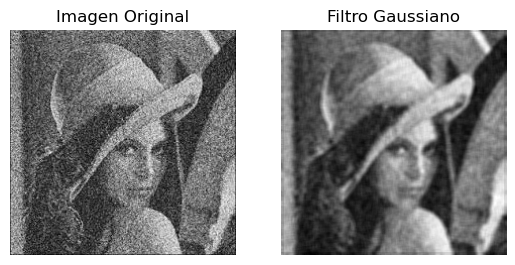

In [20]:
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro Gaussiano')
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.axis('off')

plt.show()

# Filtro de Laplace

### 📌 Definición del Filtro de Laplace

El Filtro de Laplace es un operador de segundo orden que calcula la segunda derivada de la intensidad de píxeles en una imagen. Es ampliamente utilizado para la detección de bordes, ya que resalta áreas donde la intensidad cambia rápidamente.

####
---
####

### 📐 Fórmula Matemática

La operación de Laplace en dos dimensiones se define como:

$$\Delta f(x,y) = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

Donde $f(x,y)$ representa la intensidad de píxeles en la imagen.

En términos de convolución, se puede aproximar utilizando un kernel discreto, por ejemplo:

$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$

Este kernel se aplica a cada píxel de la imagen para calcular la segunda derivada y resaltar los bordes.

### 🧠 Ejemplo Conceptual

Supongamos que tenemos una imagen con una región de transición de intensidad, como un borde entre una zona oscura y una clara. El filtro de Laplace detectará este cambio abrupto en la intensidad, produciendo valores altos en las áreas de borde y valores cercanos a cero en las regiones uniformes.

### ✅ Ventajas del Filtro de Laplace

* **Detección precisa de bordes:** Resalta áreas con cambios abruptos de intensidad.
* **Simplicidad:** Fácil de implementar y computacionalmente eficiente.

### ❌ Desventajas del Filtro de Laplace

* **Sensibilidad al ruido:** Puede amplificar el ruido en la imagen, por lo que es común aplicar un suavizado previo.
* **No distingue la dirección del borde:** A diferencia de otros filtros como Sobel, no proporciona información sobre la orientación del borde.

Vamos a usar la iamgen más limpia que hemos conseguido para visualizar mejor el resultado 

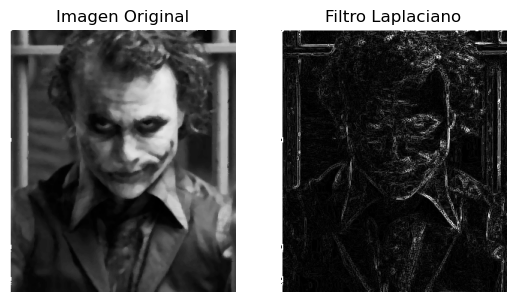

In [21]:
laplacian_image = cv2.Laplacian(median_filtered_image, ddepth=cv2.CV_64F, ksize=3)

#convertir a uint8
laplacian_image = cv2.convertScaleAbs(laplacian_image)

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro Laplaciano')
plt.imshow(laplacian_image, cmap='gray')
plt.axis('off')
plt.show()




Mejor resultado con ksize = 3

# Filtro de Sobel

### 📌 Definición del Filtro de Sobel

El filtro de Sobel es un operador de detección de bordes que calcula derivadas primeras en las direcciones horizontal y vertical. Es decir, detecta gradientes de intensidad en la imagen, y por lo tanto, bordes.
Se trata de una combinación entre derivadas y suavizado, lo que lo hace más robusto frente al ruido en comparación con el operador de Laplace.

---

### 📐 Fórmulas Matemáticas

Los dos kernels clásicos de Sobel son:

**Dirección horizontal $G_x$:**
$$K_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$$

**Dirección vertical $G_y$:**
$$K_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}$$

Luego, se calcula el módulo del gradiente en cada píxel como:

$$G = \sqrt{G_x^2 + G_y^2}$$

o también, para reducir costo computacional:

$$G \approx |G_x| + |G_y|$$

### ✅ Ventajas del Filtro de Sobel

* **Detecta bordes orientados:** Es posible obtener la dirección del borde (horizontal, vertical o ambos).
* **Robusto al ruido:** Incluye una leve suavizado por el diseño del kernel.
* **Útil para preprocesamiento:** Es comúnmente usado en tareas como segmentación de imágenes, OCR (reconocimiento óptico de caracteres), etc.

### ❌ Desventajas del Filtro de Sobel

* **No detecta bien bordes muy difusos:** Su efectividad disminuye con bordes que no son nítidos.
* **Puede generar bordes duplicados:** A veces, produce dos líneas paralelas para un solo borde grueso (una por cada lado del gradiente).

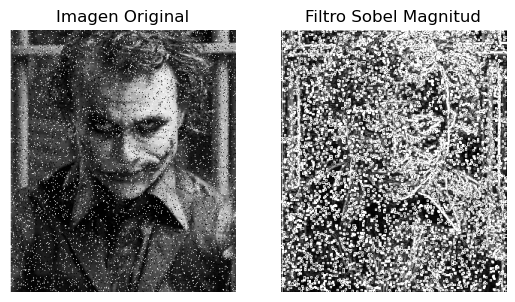

In [22]:
#Vamso a usar una imagen sin suavizar

sobel_imagex = cv2.Sobel(image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_imagey = cv2.Sobel(image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)

sobel_mag = cv2.magnitude(sobel_imagex, sobel_imagey)

sobel_mag_uint8 = cv2.convertScaleAbs(sobel_mag)

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Filtro Sobel Magnitud')
plt.imshow(sobel_mag_uint8, cmap='gray')
plt.axis('off')
plt.show()


Mejor utilicemos la imagen con el filtro de media, parece seguir siendo necesario.

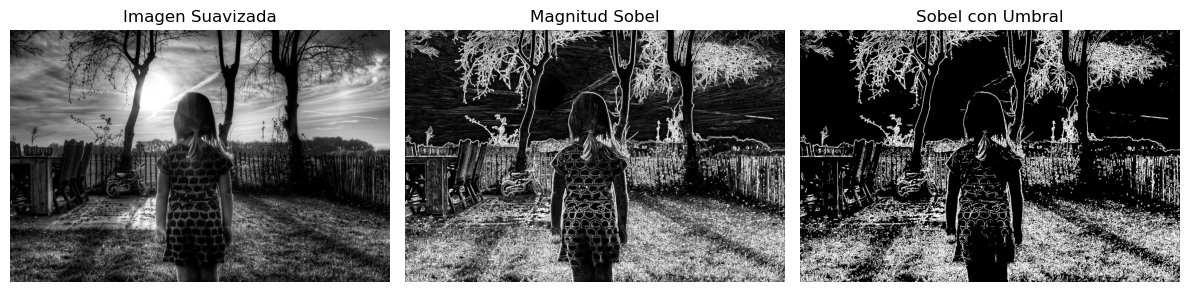

In [23]:
# Sobel en X y Y
sobel_imagex = cv2.Sobel(hd_image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobel_imagey = cv2.Sobel(hd_image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)

# Magnitud del gradiente
sobel_mag = cv2.magnitude(sobel_imagex, sobel_imagey)
sobel_mag_uint8 = cv2.convertScaleAbs(sobel_mag)

# Umbral que mejora la visualización al ajustar el contraste
_, sobel_thresh = cv2.threshold(sobel_mag_uint8, 128, 255, cv2.THRESH_BINARY)

# Visualización
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Imagen Suavizada')
plt.imshow(hd_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Magnitud Sobel')
plt.imshow(sobel_mag_uint8, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Sobel con Umbral')
plt.imshow(sobel_thresh, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Se probó con ksize 3 y 5, el mejor resultado fue con 3

# Filtro Canny

### 📌 Definición del Filtro de Canny

El Filtro de Canny es un detector de bordes multietapa que proporciona una detección precisa, fina y limpia de contornos en una imagen. Fue propuesto por John Canny en 1986 y sigue siendo uno de los más usados en visión por computadora.

### 🧠 ¿Qué hace Canny paso a paso?

1.  **Suavizado Gaussiano:** Se aplica para reducir el ruido en la imagen.
2.  **Cálculo de gradiente con Sobel:** Se utilizan los operadores de Sobel en las direcciones X e Y para encontrar los gradientes de intensidad.
3.  **Magnitud y dirección del gradiente:** Se calculan la magnitud y la dirección de los gradientes obtenidos.
4.  **Supresión de no-máximos:** Se eliminan los píxeles que no son máximos locales en la dirección del gradiente, lo que ayuda a afinar los bordes.
5.  **Umbralización doble:**
    * **Umbral alto:** Se identifican los bordes "fuertes".
    * **Umbral bajo:** Se identifican los bordes "débiles" que estén conectados a los bordes fuertes.
6.  **Seguimiento por histéresis:** Se conectan los segmentos de borde y se conservan solo aquellos bordes coherentes, eliminando los débiles y aislados.

### ✅ Ventajas del Filtro de Canny

* **Bordes delgados, nítidos y continuos:** Proporciona una detección de bordes de muy alta calidad.
* **Filtra bien el ruido:** Gracias a su proceso multietapa y el doble umbral, maneja eficazmente el ruido.
* **Ideal para diversas aplicaciones:** Muy útil en preprocesamiento para tareas como segmentación, OCR (reconocimiento óptico de caracteres) y análisis de forma.

### ❌ Desventajas del Filtro de Canny

* **Requiere calibración de umbrales:** La elección adecuada de los umbrales alto y bajo puede ser un proceso de ensayo y error y es crucial para el rendimiento.
* **Más costoso computacionalmente:** Debido a sus múltiples pasos, es más intensivo en recursos que detectores más simples como Sobel o Laplace.

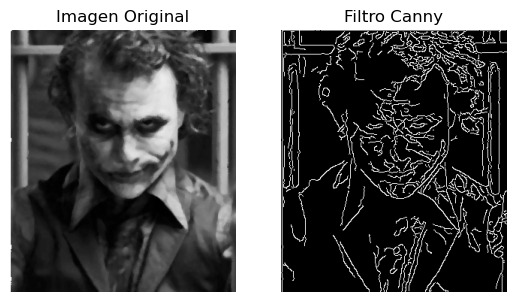

In [25]:
canny_image = cv2.Canny(median_filtered_image, threshold1=50, threshold2=100)

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)

plt.title('Filtro Canny')
plt.imshow(canny_image, cmap='gray')
plt.axis('off')
plt.show()